[0.0009008226334117353, 0.0]


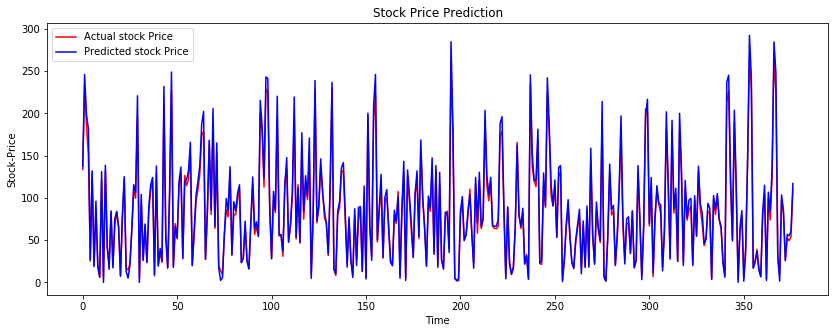

In [1]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import keras
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import accuracy_score

# YOUR IMPLEMENTATION
# Thoroughly comment your code to make it easy to follow


if __name__ == "__main__":


	# 1. Load your saved model
        loaded_model = keras.models.load_model("20868189_RNN_model")

	# 2. Load your testing data
        data2=pd.read_csv('test_data_RNN.csv')
        X_test=data2[0:377:]
        X_test=X_test.drop(['Unnamed: 0','Unnamed: 1'], axis=1) #Dropping unncessary columns
        y_test=data2[377:755:]
        y_test=y_test.drop(['Unnamed: 0','1','2','Unnamed: 1'], axis=1)#Dropping unncessary columns
        X_test, y_test=np.array(X_test), np.array(y_test)
        X_test=np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

	# 3. Run prediction on the test data and output required plot and loss
        y_pred=loaded_model.predict(X_test)
        scale=1/3.48772321e-03
        y_pred=y_pred*scale
        y_test=y_test*scale
        plt.figure(figsize=(14,5))
        plt.plot(y_test, color='red', label='Actual stock Price')
        plt.plot(y_pred, color='blue', label='Predicted stock Price')
        plt.title('Stock Price Prediction')
        plt.xlabel('Time')
        plt.ylabel('Stock-Price')
        plt.legend()
        plt.show
        y_test=y_test/scale
        Test_loss=loaded_model.evaluate(X_test, y_test, verbose=False)
        print(Test_loss)
        